found weight 1


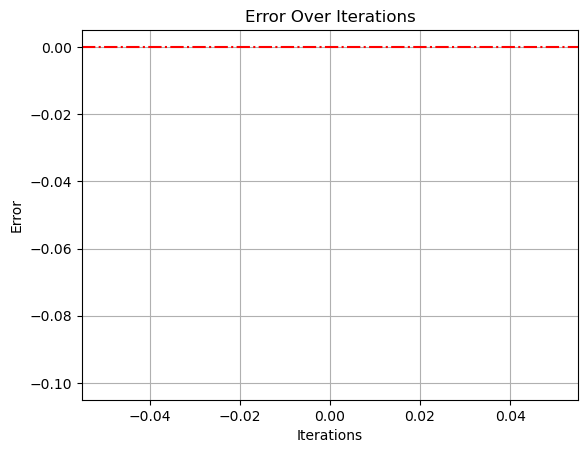

In [22]:
input=1
y=7.8 #ori output
weight=1
for i in range(0,100):
    yn=input*weight #yn=network output
    error=(y-yh)
    if(error<=0):
        print("found weight",weight)
        break
    else:
        dedw=-(input/input)*0.1 #derivative weight
        weight=weight-dedw
import matplotlib.pyplot as plt
plt.plot(error)
plt.title("Error Over Iterations")
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.axhline(0, color='red', linestyle='dashdot')  # Line at error = 0
plt.grid()
plt.show()

 

In [8]:
import numpy as np
import sklearn
import scipy

print(np.__version__)
print(sklearn.__version__)
print(scipy.__version__)
import tensorflow as tf
print(tf.__version__)

2.0.2
1.5.2
1.14.1
2.18.0


In [3]:
import numpy as np
import cv2
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

X= np.array([[0, 0, 1],
            [1, 1, 1],
            [1, 0, 1],
            [0, 1, 1],
            [0, 1, 0],
            [1, 0, 1],
            [1, 0, 0]])

Y = np.array([[0], [1], [1], [1], [0], [1], [0]])

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(3,)),
    tf.keras.layers.Dense(2, activation='relu'),                     
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])      
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

model.fit(X, Y, epochs = 1000, verbose = 0)

prediction = model.predict(X)
predicted_classes = (prediction > 0.5).astype(int)
print("Predicted: ", (prediction > 0.5).astype(int))

print("Trained weights: ")
for layer in model.layers:
    weights, biases = layer.get_weights()
    print("Weights: ", weights)
    print("Biases: ", biases)

image = np.ones((600, 800, 3), dtype=np.uint8) * 255

color_input = (0, 0, 255)  #input layer (red)
color_hidden = (0, 255, 0)  # hidden layer(green) 
color_output = (255, 0, 0)  # output(blu)
color_connection = (0, 0, 0)  #  connections(black)

input_layer_coords = [(150, 100), (150, 200), (150, 300)]  # 3 input nodes  
hidden_layer_coords = [(300, 150), (300, 250)]  # 2 hidden neurons
output_layer_coords = [(450, 200)]

for i, (x, y) in enumerate(input_layer_coords):
    cv2.circle(image, (x, y), 20, color_input, -1)
    cv2.putText(image, f'X{i+1}', (x-10, y+5), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)
 
 
for i, (x, y) in enumerate(hidden_layer_coords):
    cv2.circle(image, (x, y), 20, color_hidden, -1)
    cv2.putText(image, f'H{i+1}', (x-10, y+5), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)
 
for i, (x, y) in enumerate(output_layer_coords):
    cv2.circle(image, (x, y), 20, color_output, -1)
    cv2.putText(image, 'Output', (x-30, y+5), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2) 

for i, (x_input, y_input) in enumerate(input_layer_coords):
    for x_hidden, y_hidden in hidden_layer_coords:
        cv2.line(image, (x_input, y_input), (x_hidden, y_hidden), color_connection, 2)

for x_hidden, y_hidden in hidden_layer_coords:
    for x_output, y_output in output_layer_coords:
        cv2.line(image, (x_hidden, y_hidden), (x_output, y_output), color_connection, 2)

cv2.imshow("Neural Network Structure", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

print("Predicted Classes:", predicted_classes) 


2.18.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Predicted:  [[1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]]
Trained weights: 
Weights:  [[ 0.42748922  0.8269444 ]
 [ 0.29885963  0.6634202 ]
 [-1.6568216   1.4293762 ]]
Biases:  [ 0.9519506 -0.5080203]
Weights:  [[-1.6411693]
 [ 1.08002  ]]
Biases:  [-0.34377533]
Predicted Classes: [[1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]]
